In [1]:
import json
import pandas as pd

# Load JSON data
with open("test_results/evaluation_summary.json", "r") as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Basic statistics
stats = {
    "Number of scenes": len(df),
    "Average ARI": df["ARI"].mean(),
    "Median ARI": df["ARI"].median(),
    "Average mIoU": df["mean_IoU"].mean(),
    "Median mIoU": df["mean_IoU"].median(),
    "Average # predicted instances": df["num_pred_instances"].mean(),
    "Average # GT instances": df["num_gt_instances"].mean(),
    "ARI Std Dev": df["ARI"].std(),
    "mIoU Std Dev": df["mean_IoU"].std()
}

# Best and worst performing scenes
best_ari = df.loc[df["ARI"].idxmax()]
worst_ari = df.loc[df["ARI"].idxmin()]
best_iou = df.loc[df["mean_IoU"].idxmax()]
worst_iou = df.loc[df["mean_IoU"].idxmin()]

display(stats)
display((best_ari, worst_ari, best_iou, worst_iou))

{'Number of scenes': 99,
 'Average ARI': np.float64(0.6045613984051473),
 'Median ARI': 0.6121344767680243,
 'Average mIoU': np.float64(0.6277278542588948),
 'Median mIoU': 0.6439828276634216,
 'Average # predicted instances': np.float64(16.707070707070706),
 'Average # GT instances': np.float64(3.5454545454545454),
 'ARI Std Dev': 0.2368490920019079,
 'mIoU Std Dev': 0.12285720400943562}

(scene                 scene_068
 ARI                    0.972444
 mean_IoU               0.585747
 num_pred_instances           25
 num_gt_instances              4
 Name: 68, dtype: object,
 scene                 scene_069
 ARI                         0.0
 mean_IoU               0.300781
 num_pred_instances            8
 num_gt_instances              1
 Name: 69, dtype: object,
 scene                 scene_077
 ARI                    0.847175
 mean_IoU               0.862451
 num_pred_instances           11
 num_gt_instances              6
 Name: 77, dtype: object,
 scene                 scene_069
 ARI                         0.0
 mean_IoU               0.300781
 num_pred_instances            8
 num_gt_instances              1
 Name: 69, dtype: object)

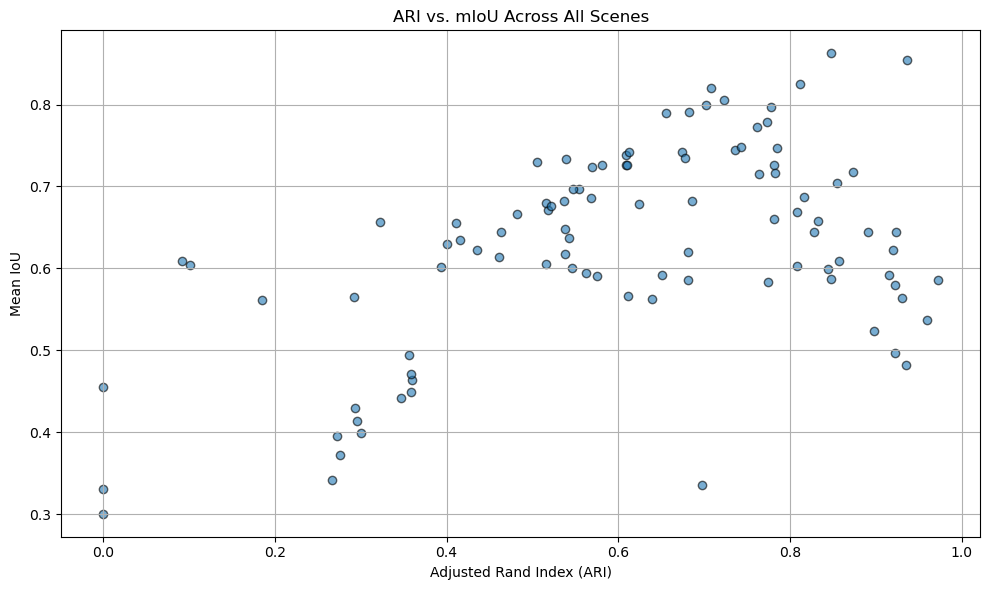

In [2]:
import matplotlib.pyplot as plt

# Plot ARI vs mIoU
plt.figure(figsize=(10, 6))
plt.scatter(df["ARI"], df["mean_IoU"], alpha=0.6, edgecolor='k')
plt.xlabel("Adjusted Rand Index (ARI)")
plt.ylabel("Mean IoU")
plt.title("ARI vs. mIoU Across All Scenes")
plt.grid(True)
plt.tight_layout()
plt.show()